In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

## Importo la data 

https://www.kaggle.com/datasets/uciml/adult-census-income/data

In [2]:
# Cargar el conjunto de datos
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 
                'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 
                'hours_per_week', 'native_country', 'income']
data = pd.read_csv(
    url,
    header=None, 
    names=column_names, 
    na_values=' ?
)

Descripción de los datos:
* age: Edad del individuo.
* workclass: Categoría de la clase de trabajo a la que pertenece el individuo.
* fnlwgt: Peso final, que representa el número de personas en la población que el individuo representa.
* education: Nivel educativo alcanzado por el individuo.
* education_num: Número asociado al nivel educativo del individuo.
* marital_status: Estado civil del individuo.
* occupation: Ocupación del individuo.
* relationship: Relación del individuo con el jefe de hogar.
* race: Raza del individuo.
* sex: Sexo del individuo.
* capital_gain: Ganancia de capital obtenida.
* capital_loss: Pérdida de capital incurrida.
* hours_per_week: Número de horas trabajadas por semana.
* native_country: País de origen del individuo.
* income: Ingreso del individuo (si es mayor o menor que 50K al año).

## Limpieza de datos

Verificar si hay valores nulos. En caso de haberlos, verificar si la cantidad de nulos de la columna es mayor al 40%. En caso de que los nulos superen el 40%, eliminar la columna, de caso contrario completarla como considere conveniente.

   Se recomienda hacer gráficos para ver visualmente comportamiento de los datos

In [3]:
data.head(20)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [4]:
data.isnull().sum() / len(data) * 100

age               0.000000
workclass         5.638647
fnlwgt            0.000000
education         0.000000
education_num     0.000000
marital_status    0.000000
occupation        5.660146
relationship      0.000000
race              0.000000
sex               0.000000
capital_gain      0.000000
capital_loss      0.000000
hours_per_week    0.000000
native_country    1.790486
income            0.000000
dtype: float64

In [14]:
def porcentaje_nulos(data):
    total_filas = len(data)
    porcentaje_nulos = data.isnull().sum() / total_filas * 100
    return porcentaje_nulos[porcentaje_nulos > 0].sort_values(ascending=False)

porcentaje_nulos(data)

Series([], dtype: float64)

<Axes: xlabel='count', ylabel='workclass'>

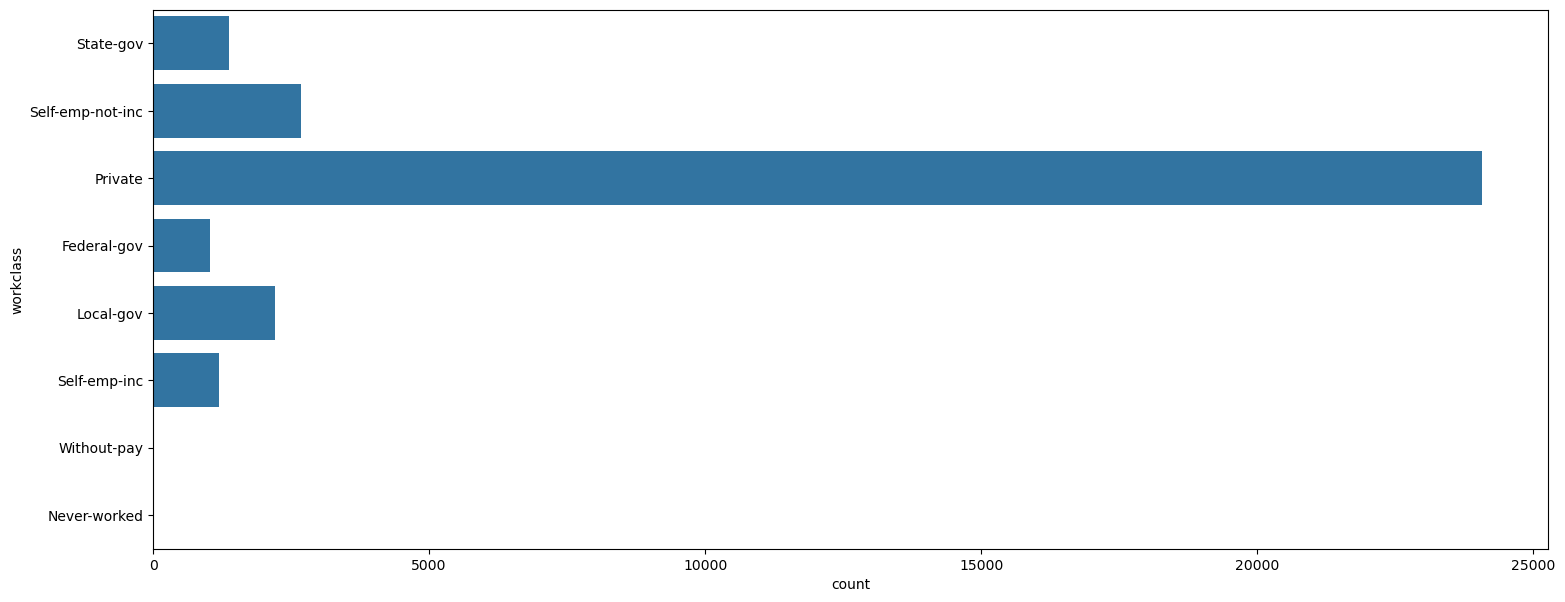

In [16]:
plt.figure(figsize=(18,7))
sns.countplot(data['workclass'])

<Axes: xlabel='count', ylabel='occupation'>

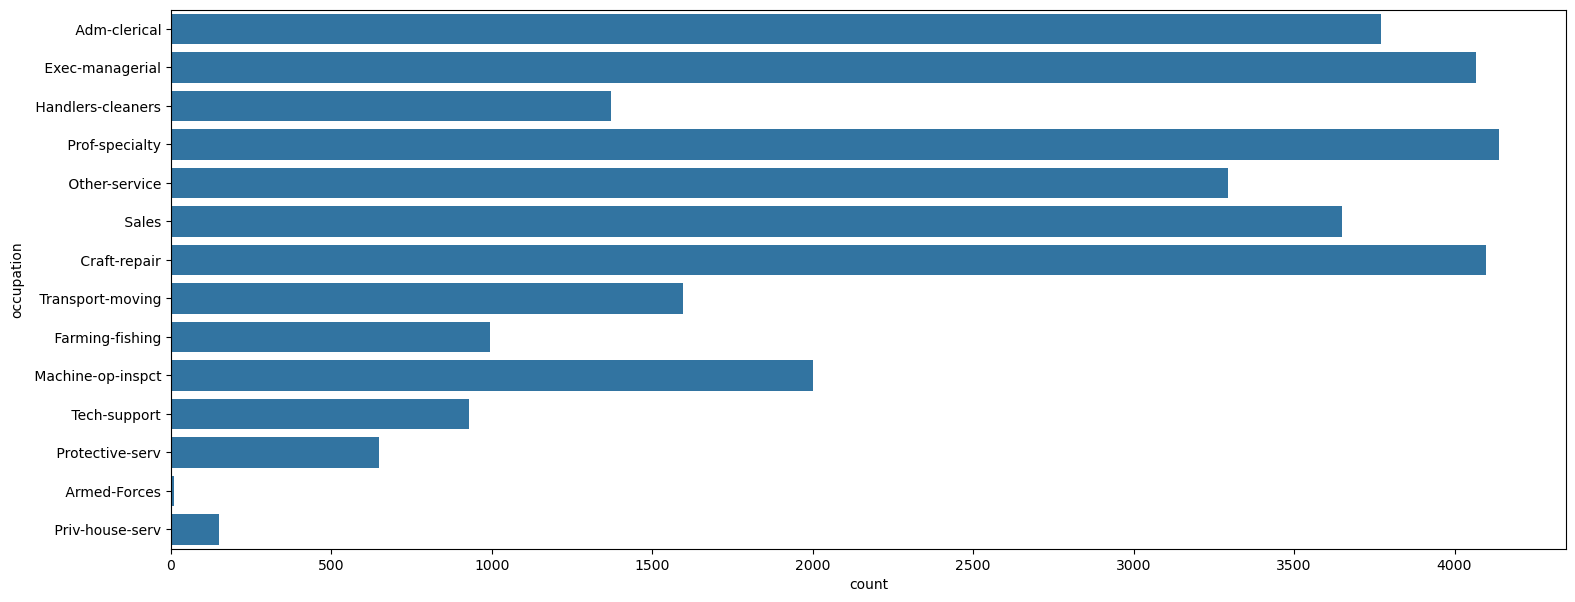

In [7]:
plt.figure(figsize=(18,7))
sns.countplot(data['occupation'])

<Axes: xlabel='count', ylabel='native_country'>

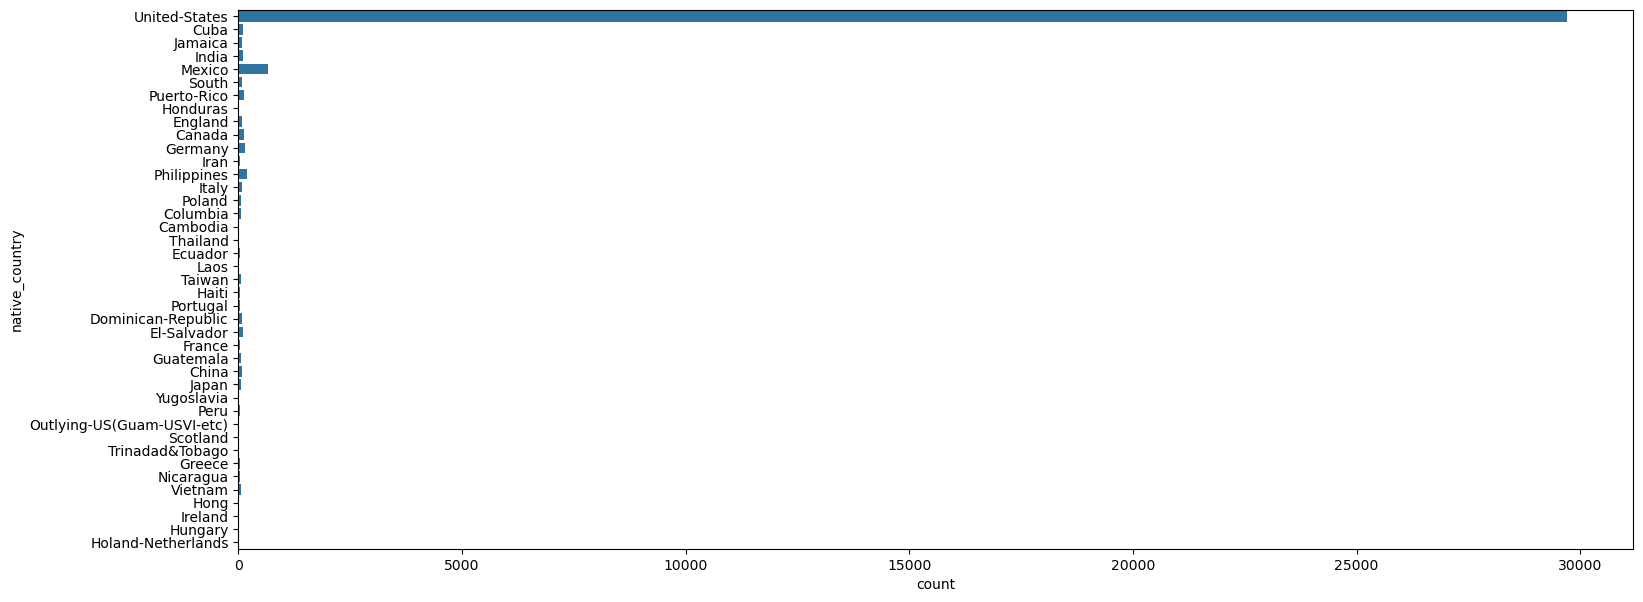

In [18]:
plt.figure(figsize=(18,7))
sns.countplot(data['native_country'])

In [9]:
def rellenar_nulos_ponderado(df, columna):
    distribucion = data[columna].value_counts(normalize=True)
    n_nulos = data[columna].isna().sum()
    if n_nulos == 0:
        return
        
    rellenos = np.random.choice(distribucion.index, size=n_nulos, p=distribucion.values)
    data.loc[df[columna].isna(), columna] = rellenos

In [10]:
rellenar_nulos_ponderado(data, 'workclass')
rellenar_nulos_ponderado(data, 'occupation')
rellenar_nulos_ponderado(data, 'native_country')

In [13]:
data['native_country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', 'Mexico', 'South',
       'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany', 'Iran',
       'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [12]:
for col in data.columns:
    if data[col].dtype == "object":
        data[col] = data[col].str.replace(" ", "", regex=False)

Realizar countplot de todas las variables categóricas que no haya graficado y tratar de identificar patrones, datos a agrupar o columnas a eliminar.

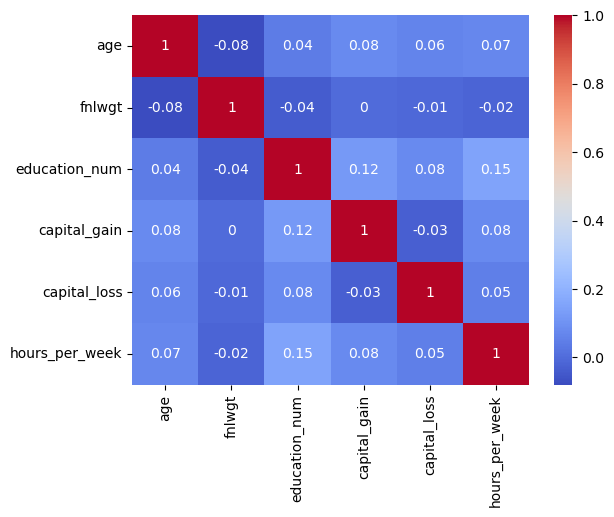

In [19]:
datos_numericos = data.select_dtypes(include='number')
sns.heatmap(datos_numericos.corr().round(2), cmap="coolwarm", annot=True)
plt.show()

In [20]:
data['race'] = data['race'].apply(lambda x: x if x in ['White', 'Black'] else 'Other')

In [21]:
def graficar_countplots_categoricas(df):
    columnas_categoricas = df.select_dtypes(include=['object', 'category']).columns.tolist()
    
    n = len(columnas_categoricas)
    filas = (n + 2) // 3

    plt.figure(figsize=(18, 5 * filas))

    for i, var in enumerate(columnas_categoricas, 1):
        plt.subplot(filas, 3, i)
        sns.countplot(x=df[var])
        plt.title(f'Countplot de {var}')
        plt.xticks(rotation=90)

    plt.tight_layout()
    plt.show()


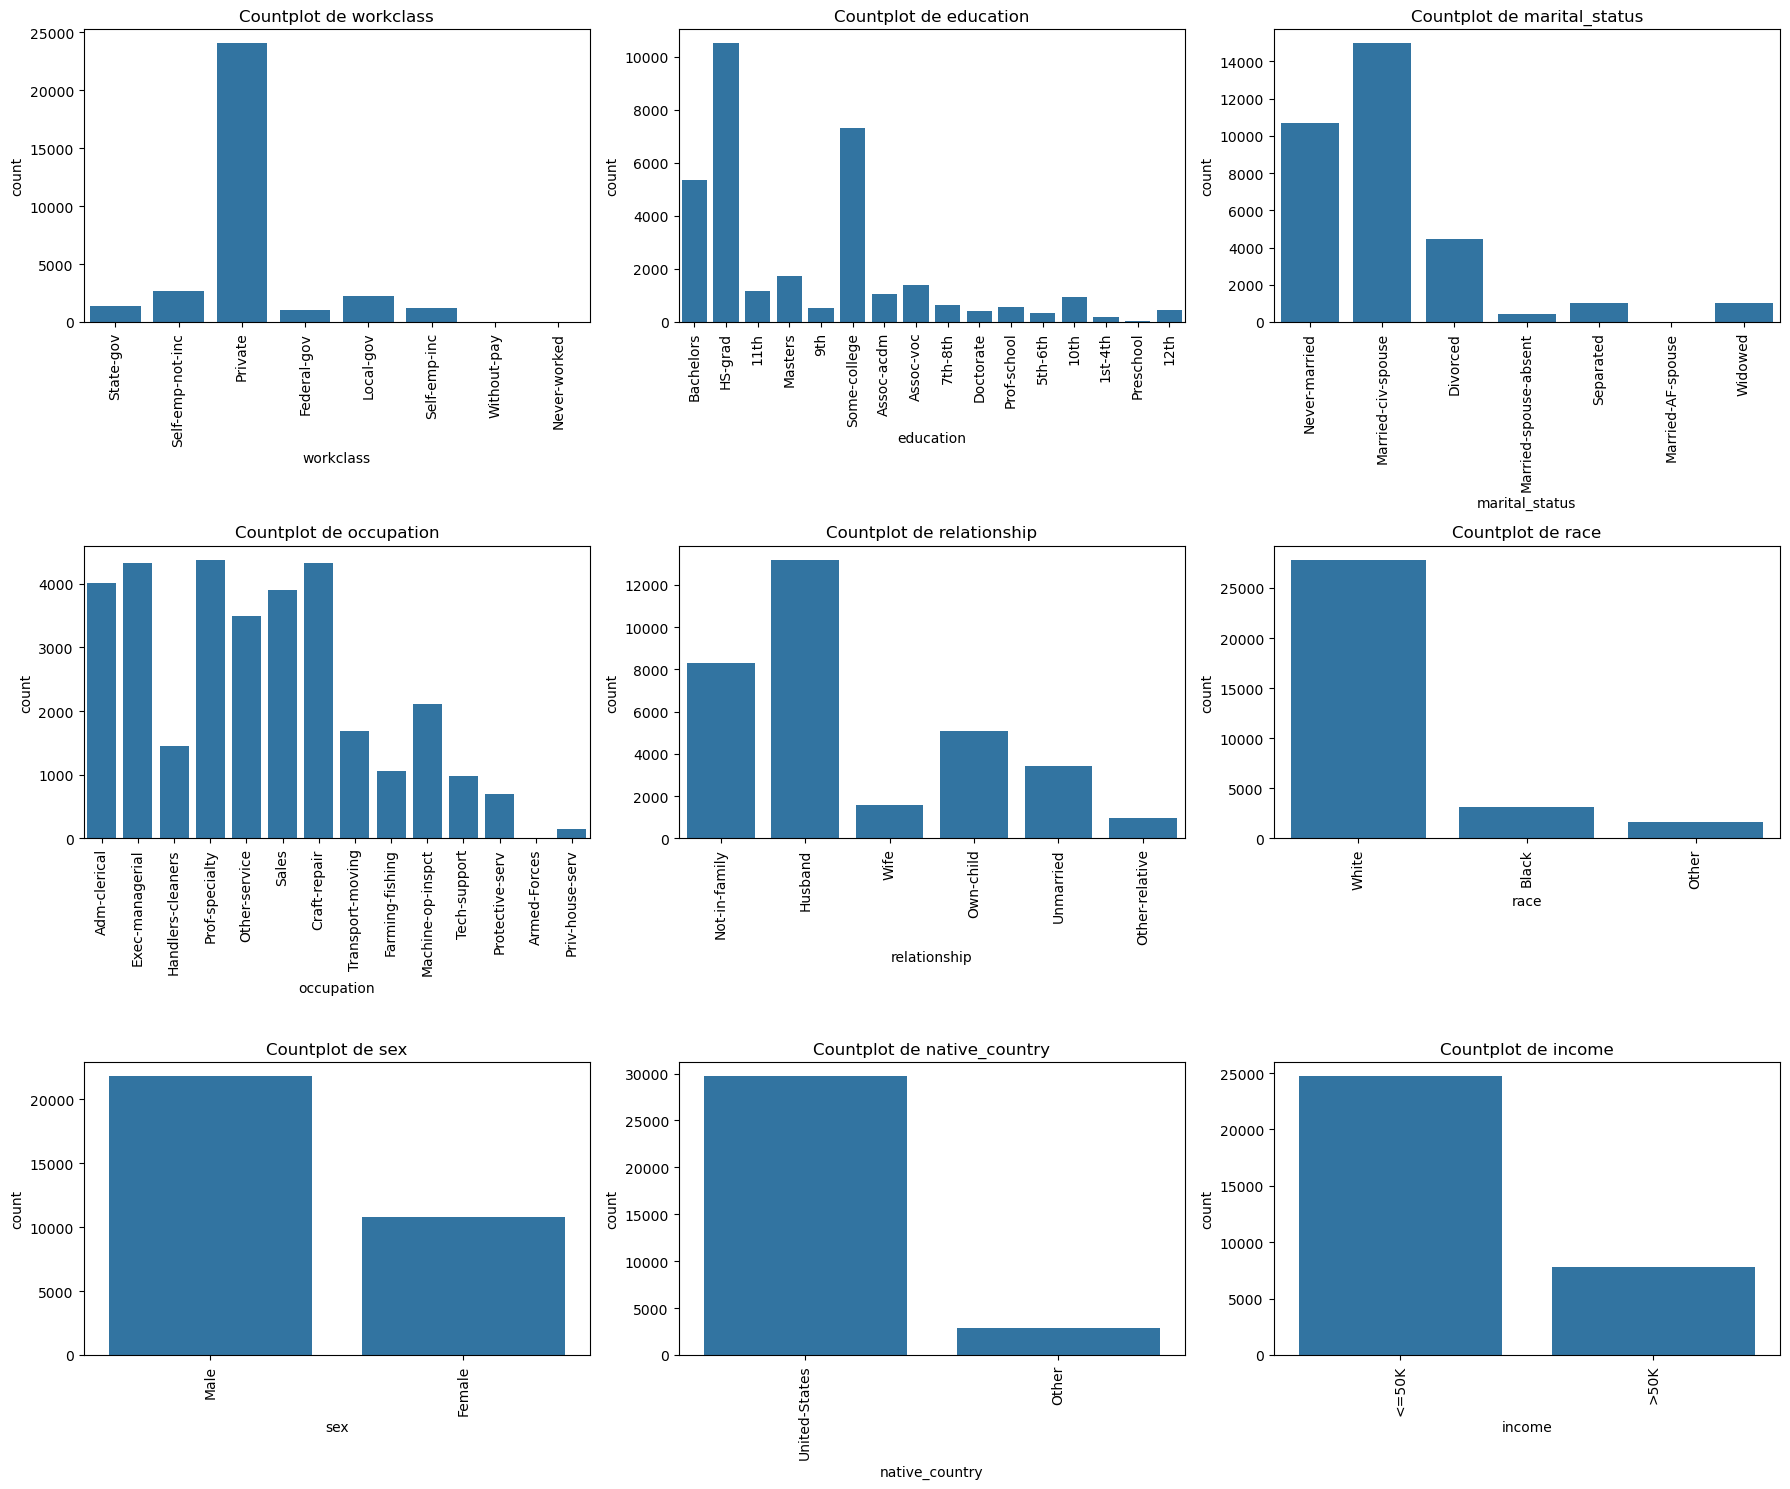

In [22]:
graficar_countplots_categoricas(data)

Codificar variables categóricas binarias a 0 y 1. (Income y Sex)

In [25]:
data["sex"]= data["sex"].replace({"Male": 0, "Female": 1})
data["income"]= data["income"].replace({"<=50K": 0, ">50K": 1})

In [26]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,0,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,1,0,0,40,Other,0


Reducir columna educación en 5 valores

* Primaria o Menos: 'Preschool', '1st-4th', '5th-6th'
* Secundaria Incompleta: '7th-8th', '9th', '10th', '11th', '12th'
* Secundaria Completa: 'HS-grad'
* Educación Técnica/Universitaria Incompleta: 'Some-college', 'Assoc-acdm', 'Assoc-voc'
* Grado Universitario o Superior: 'Bachelors', 'Masters', 'Prof-school', 'Doctorate'

In [27]:
data['education'] = data['education'].apply(
    lambda x: 'Primaria o Menos' if x in ['Preschool', '1st-4th', '5th-6th']
    else 'Secundaria Incompleta' if x in ['7th-8th', '9th', '10th', '11th', '12th']
    else 'Secundaria Completa' if x == 'HS-grad'
    else 'Educación Técnica/Universitaria Incompleta' if x in ['Some-college', 'Assoc-acdm', 'Assoc-voc']
    else 'Grado Universitario o Superior' if x in ['Bachelors', 'Masters', 'Prof-school', 'Doctorate']
    else 'Otro'
)

Dado que la columna educacion y educacion_num proporcionan la misma información, eliminar educacion_num

In [28]:
 data.drop("education_num", axis=1, inplace=True)

Reducir columna relationship en 4 valores

* Esposo/Esposa: Incluye 'Wife', 'Husband'. 
* Hijo: Incluye 'Own-child'. 
* Otro Pariente: Incluye 'Other-relative'. 
* No en Familia: Incluye 'Not-in-family', 'Unmarried'.

In [29]:
data['relationship'] = data['relationship'].apply(
    lambda x: 'Esposo/Esposa' if x in ['Wife', 'Husband']
    else 'Hijo' if x == 'Own-child'
    else 'Otro Pariente' if x == 'Other-relative'
    else 'No en Familia' if x in ['Not-in-family', 'Unmarried']
    else x
)

Reducir columna marital_status en 3 valores

* Casado: Incluye 'Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'.
* No Casado: Incluye 'Never-married'.
* Separado/Divorciado/Viudo: Incluye 'Divorced', 'Separated', 'Widowed'.

In [30]:
data['marital_status'] = data['marital_status'].apply(
    lambda x: 'Casado' if x in ['Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse']
    else 'No Casado' if x == 'Never-married'
    else 'Separado/Divorciado/Viudo' if x in ['Divorced', 'Separated', 'Widowed']
    else x
)

Dado que casi todas las personas nacieron en EEUU, modificar la columna native-country para que los valores sean "United-States" o "Other"

In [31]:
data['occupation'] = data['occupation'].apply(
    lambda x: 'Other' if x in ['Armed-Forces','Priv-house-serv'] else x
)

Reducir columna workclass en 3 valores

* Privado: Incluye 'Private'.
* Autónomo: Incluye 'Self-emp-not-inc', 'Self-emp-inc'.
* Gobierno: Incluye 'Federal-gov', 'Local-gov', 'State-gov'.
* Sin Pago/No Trabajado: Incluye 'Without-pay', 'Never-worked'.

In [32]:
data['workclass'] = data['workclass'].apply(
    lambda x: 'Privado' if x == 'Private'
    else 'Autónomo' if x in ['Self-emp-not-inc', 'Self-emp-inc']
    else 'Gobierno' if x in ['Federal-gov', 'Local-gov', 'State-gov']
    else 'Sin Pago/No Trabajado' if x in ['Without-pay', 'Never-worked']
    else x
)

Convertir variables categóricas a variables dummy

In [33]:
print(data.dtypes)

age                int64
workclass         object
fnlwgt             int64
education         object
marital_status    object
occupation        object
relationship      object
race              object
sex                int64
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income             int64
dtype: object


In [34]:
lista_categorias = ["workclass","education","marital_status","occupation","relationship","race","native_country"]

data = pd.get_dummies(
    data, 
    columns=lista_categorias,
    drop_first = True
)

## Generar modelo

Dividir datos en train y testing

In [35]:
X = data.drop(["income"], axis=1)
y = data["income"] 

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    train_size = 0.75,
    test_size = 0.25,
    random_state = 0
)

Realizar modelo de arbol de decisión para predecir ingresos. Probar distintas profundidades hasta considerar que se tiene la profundidad óptima en función del accuracy del modelo

In [37]:
def plot_accuracy_vs_max_depth(X_train, X_test, y_train, y_test, min_depth, max_depth, nom_tree_model):
    best_depth = None
    best_score = 0

    for depth in range(min_depth, max_depth + 1):
        clf = nom_tree_model(max_depth=depth)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        score = accuracy_score(y_test, y_pred)
        #print(f'{depth} = Score: {score:.4f}')
        
        if score > best_score:
            best_score = score
            best_depth = depth

    print(f"\nMejor max_depth: {best_depth} con Score: {best_score:.4f}")

In [38]:
plot_accuracy_vs_max_depth(X_train, X_test, y_train, y_test, 1, 25,DecisionTreeClassifier)


Mejor max_depth: 9 con Score: 0.8564


In [39]:
clf = DecisionTreeClassifier(max_depth=9)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9)

In [40]:
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8564058469475494

Generar árbol del modelo

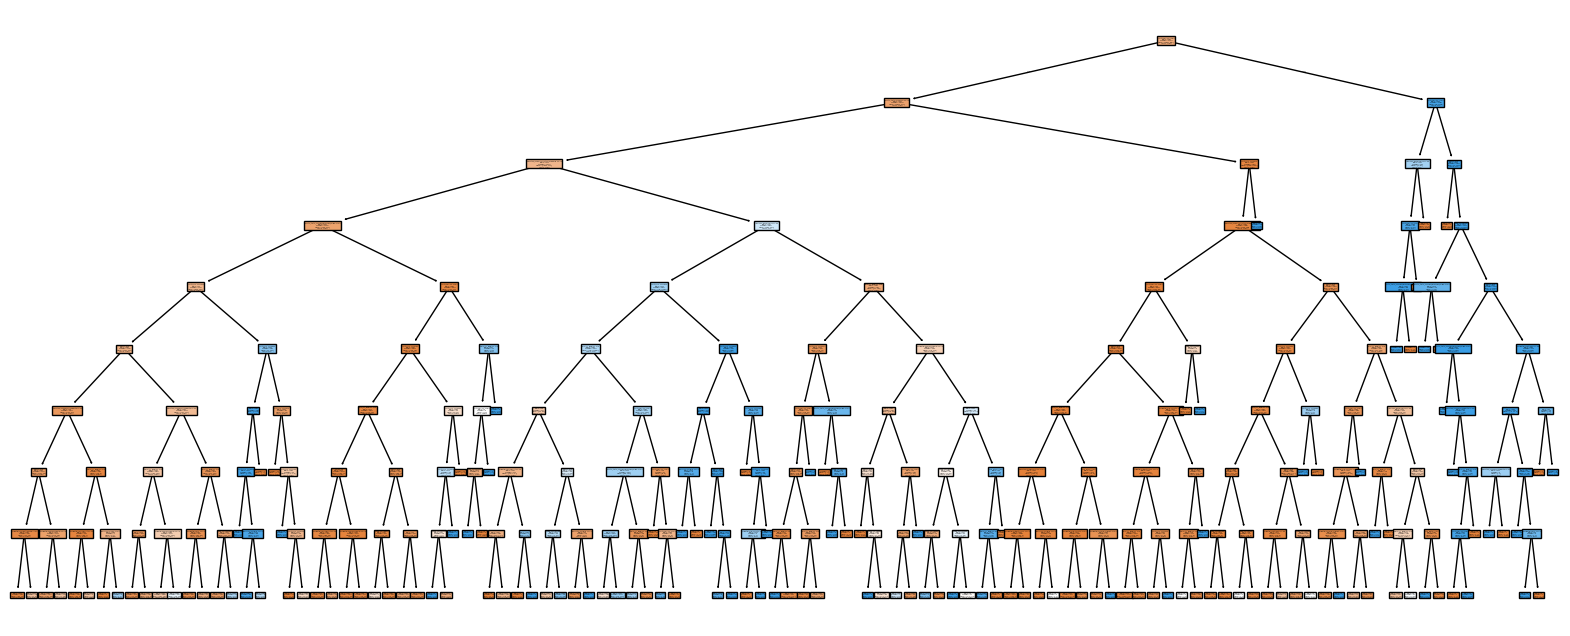

In [41]:
plt.figure(figsize=(20,8))
plot_tree(
    clf,
    filled=True,
    class_names=['<=50K', '>50K'],
    feature_names=X_train.columns
)
plt.show()

Generar modelo con Random Forest

In [42]:
plot_accuracy_vs_max_depth(X_train, X_test, y_train, y_test, 1, 20,RandomForestClassifier)


Mejor max_depth: 9 con Score: 0.8563


In [43]:
clf = RandomForestClassifier(max_depth = 9)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9)

In [44]:
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8561601768824468